<b>Do you know this feeling? You just want to look at cute Dog-pics, but your friends only send you Cat-Memes? Are you also tired of looking at cat-pictures in internetforums? If only there was a way to automatically distinguish between cat- and dog-pictures!</b>

But wait.... There is!  
The following code will create a model that can classify dog- and cat-pictures so future applications can finally eliminate all cat-pictures from the internet.

# Buisness understanding
A model is required to differentiate between cats and dog pictures and to classify an animal picture as a dog or a cat correctly. That model can be integrated in future applications such as discord bots to allow only cat images in a channel or eliminate all recognized cat-pictures from the internet. 

Import neccessary libaries:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.utils.vis_utils import plot_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
import pathlib

# Data understanding and preparation
Set the paths for the training and validation directories:

In [ ]:
training_dir = 'drive/MyDrive/dataset/training_set'
training_dir = pathlib.Path(training_dir)
test_dir = 'drive/MyDrive/dataset/training_set'
test_dir = pathlib.Path(test_dir)

Count the number of training and test images:  

In [ ]:
image_count_training = len(list(training_dir.glob('*/*.jpg')))
image_count_testing = len(list(test_dir.glob('*/*.jpg')))
print('Test images:', image_count_testing)
print('Training images:', image_count_training)

Test images: 8000
Training images: 8000


Conclusion: With a quantity of 8000, both datasets contain the same amount of images.

Show an example image from the dog training set:

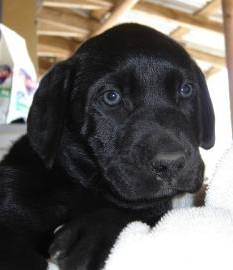

In [ ]:
training_dogs = list(training_dir.glob('dogs/*'))
PIL.Image.open(str(training_dogs[0]))

Show another example image from the dog training set.
As one can see, height and width of the pictures are different from each other:

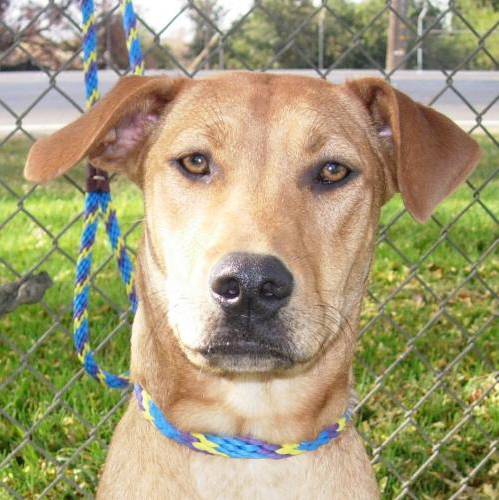

In [ ]:
PIL.Image.open(str(training_dogs[1]))

Since the images differ from width and height, a normalization is necessary so that the CNN model can receive the same input quantity of pixels. 
So, we are going to define the height and the width for our normalization:

In [ ]:
image_height = 180
image_width = 180

Normalise the pictures into the format (width=180, height=180):

In [ ]:
training_dir = tf.keras.preprocessing.image_dataset_from_directory( training_dir, image_size=(image_height, image_width), batch_size=32)
test_dir = tf.keras.preprocessing.image_dataset_from_directory( test_dir, image_size=(image_height, image_width), batch_size=32)

Found 8000 files belonging to 2 classes.
Found 8000 files belonging to 2 classes.


Get the class_names from the training directory.

In [ ]:
class_names = training_dir.class_names
print(class_names)

['cats', 'dogs']


Show 9 pictures from the normalized training_dir:   
As one can see, the pictures are sometimes stretched since the width-height-ratio originally wasn't 1:1 for them.

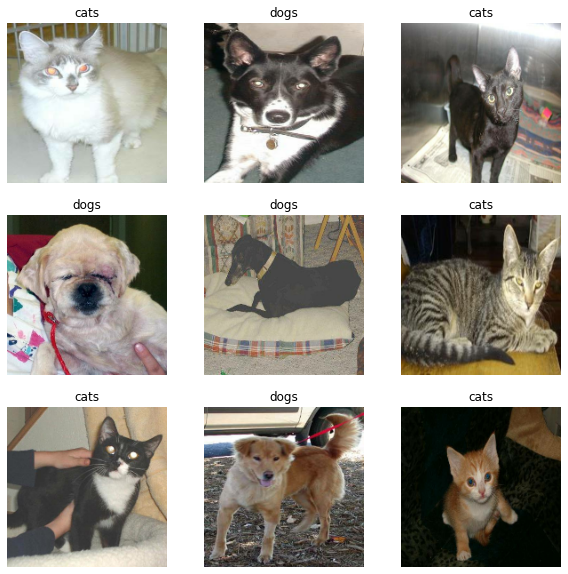

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in training_dir.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

# Modelling
AUTOTUNE parallelizes the "read" and "train" mechanisms for faster performance. Since a GPU is used, the parallelisation increases the model training speed.

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

training_dir = training_dir.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_dir = test_dir.cache().prefetch(buffer_size=AUTOTUNE)

Create a model for image processing which has three convolutional layers and three pooling layers. Use "adam" as optimizer and "ReLU" as activation function. One connected layer is placed right before the output. The output layer, which is another connected layer, contains two output nodes corresponding to the two classes "dogs" and "cats".

In [ ]:
num_classes = 2

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(image_height, image_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Summarize the model:

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0

Train the Model:  
Training is split into 10 epochs. 

In [ ]:
epochs=10
history = model.fit(
  training_dir,
  validation_data=test_dir,
  epochs=epochs
)

Epoch 1/10
250/250 [==============================] - 3533s 1s/step - loss: 0.6910 - accuracy: 0.5791 - val_loss: 0.5808 - val_accuracy: 0.6870
Epoch 2/10
250/250 [==============================] - 251s 1s/step - loss: 0.5572 - accuracy: 0.7167 - val_loss: 0.4805 - val_accuracy: 0.7785
Epoch 3/10
250/250 [==============================] - 251s 1s/step - loss: 0.4807 - accuracy: 0.7674 - val_loss: 0.4173 - val_accuracy: 0.8092
Epoch 4/10
250/250 [==============================] - 252s 1s/step - loss: 0.4112 - accuracy: 0.8123 - val_loss: 0.3416 - val_accuracy: 0.8659
Epoch 5/10
250/250 [==============================] - 252s 1s/step - loss: 0.3257 - accuracy: 0.8562 - val_loss: 0.2670 - val_accuracy: 0.9009
Epoch 6/10
250/250 [==============================] - 252s 1s/step - loss: 0.2260 - accuracy: 0.9106 - val_loss: 0.1387 - val_accuracy: 0.9570
Epoch 7/10
250/250 [==============================] - 253s 1s/step - loss: 0.1437 - accuracy: 0.9436 - val_loss: 0.1053 - val_accuracy: 0.959

# Evaluation
Show the accuracy and the Loss for each epoch:  
Training the model multiple times actually creates different results: While our first trained Model only reached an validation accuracy of 98.6%, the second Model reached 0.5% better. Testing with the confusion matrix also shows different results. From now on, the first (and worse) model will be named CatVsDog, while the second Model is named CatVsDog2. Output data is usually from CatVsDog2.

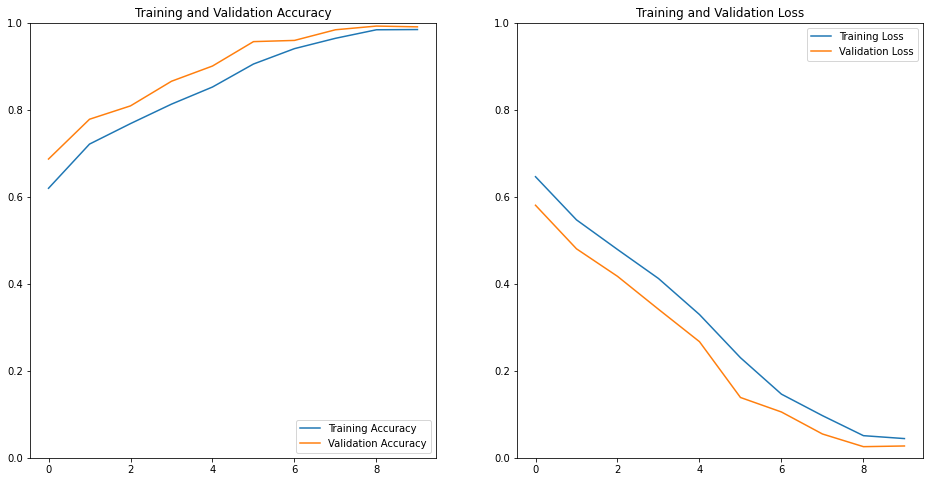

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.ylim([0,1])

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.ylim([0,1])
plt.show()

The training and validation accuracy rises with every epoch, while the loss decreases with each epoch iteration. This means that the model's accuracy rises, reaching a near 100%. To conclude, the model gets highly more and more accurate in differentiating between dogs and cats pictures while classifying them correctly. With a monotone increase in accuracy and a monotone decrease in loss, one can conclude that the model gets optimized with each iteration. Also, a high accuracy on the validation data means that the model, in the end, isn't overfitted. So, the model will also be highly accurate on unknown pictures without any label.

## Saving and Loading
Save the model:

In [ ]:
model.save('drive/MyDrive/CatVsDog') #CatVsDog2 is slightly better

INFO:tensorflow:Assets written to: drive/MyDrive/CatVsDog2/assets


Load the model:  
From now on, the loaded model is used since the following code was created in a different session.

In [ ]:
model_loaded = keras.models.load_model('drive/MyDrive/CatVsDog2')

The loaded model is evaluated with the validation data to see if it is still as effective as the created model (the output is stil from the old CatVsDog model, the CatVsDog2 model is 0.5% better on the validation data):

In [ ]:
results = model_loaded.evaluate(test_dir, batch_size=32)
print("test loss, test acc:", results)

250/250 [==============================] - 90s 356ms/step - loss: 0.0348 - accuracy: 0.9869
test loss, test acc: [0.034825194627046585, 0.9868749976158142]


## Generate Confusion Matrix
Classify all test_data with the model:

In [ ]:
test_predictions = model_loaded.predict(test_dir, batch_size=32) # don´t forget to hit AUTOTUNE or this will load pretty slow

In [ ]:
print(np.concatenate([y for x, y in test_dir], axis=0))

[1 0 0 ... 0 1 1]


In [ ]:
print(test_predictions)

[[-2.5831194  3.8880122]
 [ 5.291553  -3.842529 ]
 [ 5.4609    -3.9495616]
 ...
 [ 8.944186  -8.7675085]
 [-1.7676824  2.7127151]
 [-7.257222   8.4390955]]


The predictions aren´t in the [0, 1] format, which is why we have to apply the functions softmax() and argmax() to them:

In [ ]:
test_predictions_softmax_argmax = [np.argmax(tf.nn.softmax(x)) for x in test_predictions]

In [ ]:
all_test_data_labels = np.concatenate([y for x, y in test_dir], axis=0)

Generating the confusion matrix:
59 dogs are classified as cats while 13 cats are classified as dogs. (94 dogs and 11 cats with the CatvsDog classifier )

In [ ]:
confusion_matrix(all_test_data_labels, test_predictions_softmax_argmax,)

array([[3987,   13],
       [  59, 3941]])

## Generate ROC Curve

In [ ]:
fpr_keras, tpr_keras, thresholds_keras = roc_curve(np.concatenate([y for x, y in test_dir], axis=0), test_predictions_softmax_argmax)

Plot the Figure: As one can see, the ROC-Curve is nearly perfect.

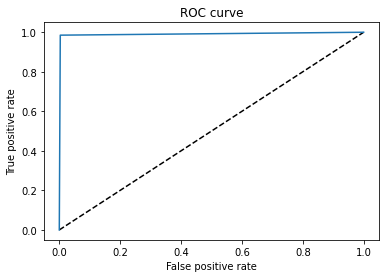

In [ ]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()

The zoomed in version shows that the classification is slightly worse than a perfect ROC. Since the actual Gain from allowing false positives is minimal, we can take the minimal false positive value for our cat-filter.

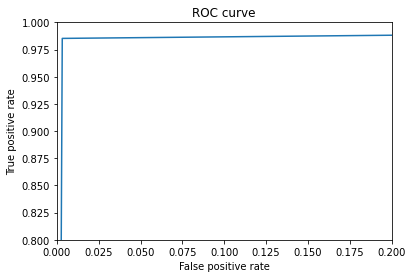

In [ ]:
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()

## Which images are wrongly classified?
Get the numbers in the classification-arrays that have the wrong classification.

In [ ]:
all_test_dir_predictions = np.concatenate([y for x, y in test_dir], axis=0)
all_wrong_predictions = []
for i in range(len(test_predictions_softmax_argmax)):
  if test_predictions_softmax_argmax[i] != all_test_dir_predictions[i]:
    all_wrong_predictions.append(i)

In [ ]:
print(all_wrong_predictions)

[37, 139, 227, 375, 463, 611, 721, 838, 991, 1094, 1345, 1694, 1790, 1953, 2002, 2005, 2148, 2276, 2279, 2354, 2459, 2488, 2663, 2680, 2787, 2891, 2927, 3407, 3515, 3540, 3585, 3831, 3882, 3939, 4060, 4156, 4214, 4267, 4385, 4391, 4549, 4584, 4615, 4702, 4749, 4817, 4852, 5035, 5050, 5146, 5365, 5486, 5573, 6165, 6194, 6252, 6416, 6439, 6518, 6643, 6729, 6887, 7005, 7056, 7114, 7197, 7288, 7434, 7583, 7607, 7924, 7938]


A iterable images-array has to be created since the tf.data batches are not iterable:

In [ ]:
iteratable_images = np.concatenate([x for x, y in test_dir], axis=0)

Show 25 pictures from the Dataset that were wrongly classified:  

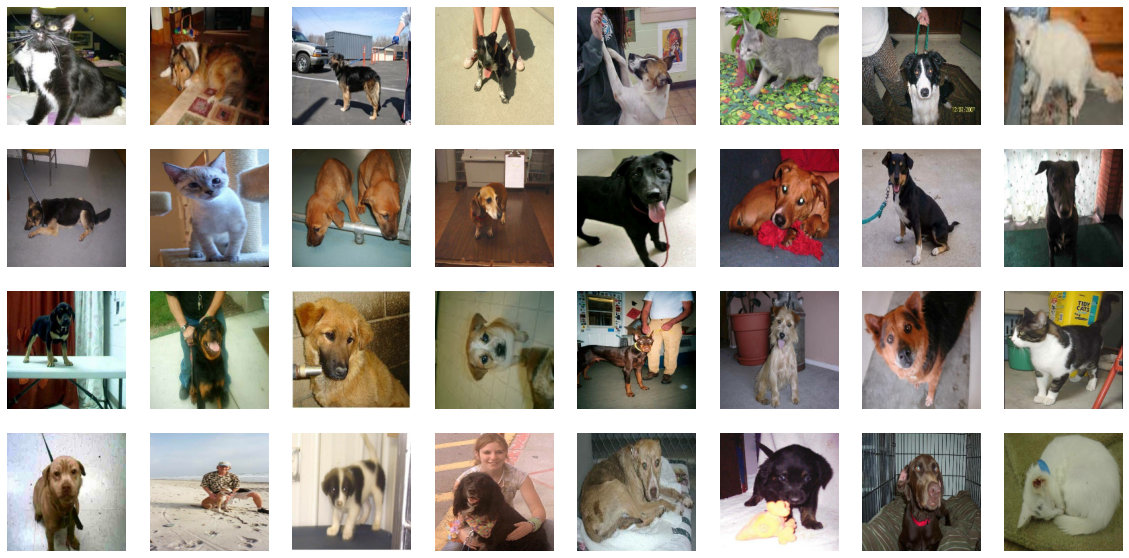

In [ ]:
plt.figure(figsize=(20, 10))
for i in range(32):
  image = iteratable_images[all_wrong_predictions[i]]
  ax = plt.subplot(4, 8, i + 1)
  plt.imshow(image.astype("uint8"))
  plt.axis("off")

There seems to be no overall similarity in the pictures nor any distinct feature in the pictures which causes the model to classify wrongly.

# Deployment - Classify Images from the Internet
Let the model classify random dog and cat pictures from the internet:

In [ ]:
def classify_dog_cat_image(image_url, image_path_name):
  image_path = tf.keras.utils.get_file(image_path_name, origin=image_url)

  img = keras.preprocessing.image.load_img(
    image_path, target_size=(image_height, image_width)
  )
  img_array = keras.preprocessing.image.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0) # Create a batch

  predictions = model_loaded.predict(img_array)
  score = tf.nn.softmax(predictions[0])
  print(
      "This image most likely belongs to {} with a {:.2f} percent confidence."
      .format(class_names[np.argmax(score)], 100 * np.max(score))
  )
  return PIL.Image.open(str(image_path))

49152/49021 [==============================] - 0s 7us/step
This image most likely belongs to dogs with a 100.00 percent confidence.


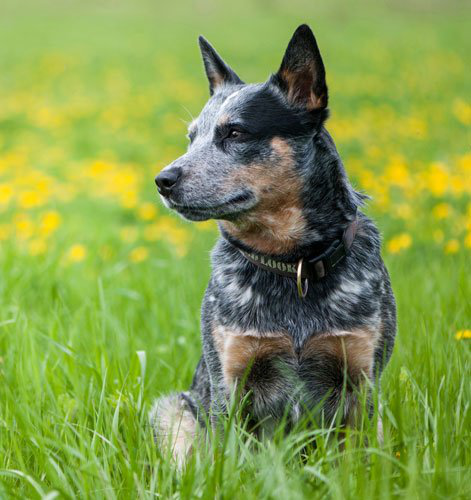

In [ ]:
classify_dog_cat_image('https://hund.info/wp-content/uploads/2019/01/Australien-Cattle-Dog2.jpg', 'dog_on_lawn')

57344/56803 [==============================] - 0s 0us/step
This image most likely belongs to cats with a 100.00 percent confidence.


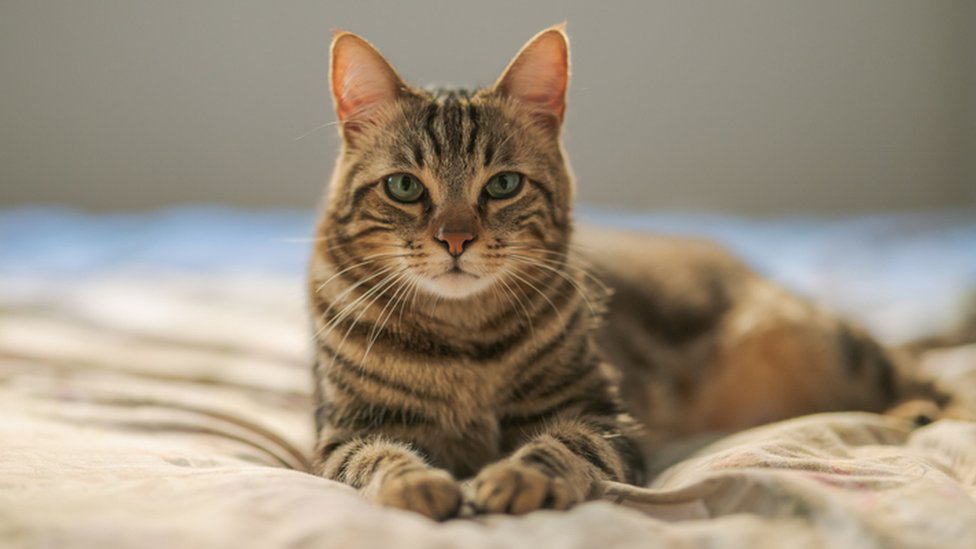

In [ ]:
classify_dog_cat_image('https://c.files.bbci.co.uk/12A9B/production/_111434467_gettyimages-1143489763.jpg', 'cat_in_bed')

73728/69174 [===============================] - 0s 0us/step
This image most likely belongs to cats with a 97.61 percent confidence.


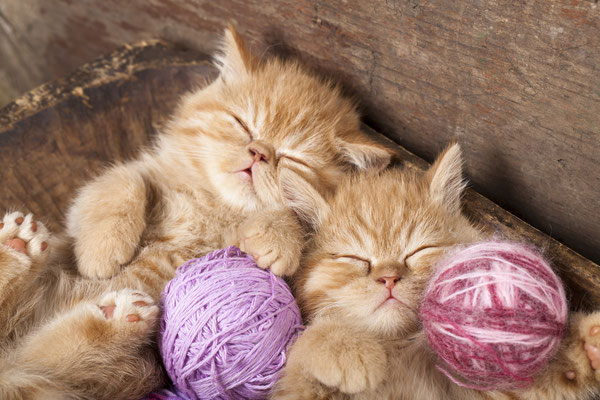

In [ ]:
classify_dog_cat_image('https://image.jimcdn.com/app/cms/image/transf/dimension=1920x400:format=jpg/path/sd435297154b38155/image/id2c018c0b691392d/version/1585072216/image.jpg', 'cat_with_strings')

40960/35148 [==================================] - 0s 3us/step
This image most likely belongs to dogs with a 100.00 percent confidence.


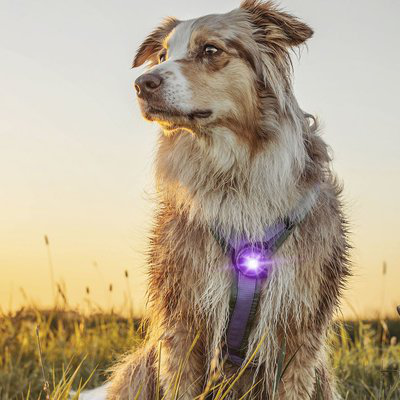

In [ ]:
classify_dog_cat_image( 'https://d1aev0esfa35jt.cloudfront.net/medium/o/orbiloc-dog-dual-safety-light-hundelicht-1602682935.jpg', 'dog_with_light')